In [1]:
import h5py 
import numpy as np 
import pandas as pd 

In [2]:
def repair_entry():
    dir="/Users/ada/Documents/git_repos/phd/rhombi/utils/percolation_study/pore_size_estimation/example_data/rhombi/pore_measure_example_data/"
    file_name = "pore_measures_005_temp_0.1_delta_0.2_dmo_as1.h5"

    with h5py.File("{}{}".format(dir,file_name), 'r+') as f: 

        for groups in f.keys():
            real_phi = f[groups].attrs['fid'].split("_")[5]
            print(real_phi)
            f[groups].attrs.modify('phi', real_phi)
        

repair_entry()


0.01
0.05
0.075
0.125
0.15
0.175
0.1
0.225
0.227
0.25
0.2
0.35
0.375
0.3
0.425
0.45
0.475
0.4
0.525
0.5


In [3]:

dir="/Users/ada/Documents/git_repos/phd/rhombi/utils/percolation_study/pore_size_estimation/example_data/rhombi/pore_measure_example_data/"
file_name = "pore_measures_005_temp_0.1_delta_0.2_dmo_as1.h5"

f = h5py.File("{}{}".format(dir,file_name), 'r+')


In [4]:
for key in f.keys():
    print(key)
    print(f[key].attrs)
    for k in f[key].attrs.keys():
        print(k, f[key].attrs[k])

    for dset_name in f[key]:
        print(dset_name)
        print(f[key][dset_name][:])

double_mouse_asymm_1_phi_0.01_delta_0.2_temp_0.10_36300000
<Attributes of HDF5 object at 140604252061456>
delta 0.2
fid double_mouse_asymm_1_phi_0.01_delta_0.2_temp_0.10_36300000
last_time 36300000
max_domain 128275.00045797422
phi 0.01
ptype double_mouse_asymm_1
run_id 0
temperature 0.1
circumference
[1.980339  4.455763  7.921356  7.4262714 6.436102  6.9311867 6.436102
 4.455763  7.921356  1.4852543 4.9508476 4.9508476 6.9311867 5.941017
 5.4459324 6.436102  2.9705086 4.455763  6.436102  3.4655933 7.921356
 1.980339  5.4459324 6.9311867 4.9508476 6.9311867 3.960678  5.941017
 5.941017  1.4852543 2.4754238 7.921356  5.4459324 5.941017  5.941017
 3.4655933 5.941017  6.9311867 6.9311867 6.436102  5.4459324 6.436102
 4.9508476 5.941017  2.9705086]
convex_hull_ratio
[0.85714287 0.82758623 0.74157304 0.80487806 0.7017544  0.7234042
 0.62222224 0.8235294  0.72727275 1.         0.7368421  0.85
 0.82666665 0.8301887  0.75555557 0.76666665 0.85714287 0.8484849
 0.7936508  0.90909094 0.6923077  

In [5]:
class H5ls:
    def __init__(self):
        # Store an empty list for dataset names
        self.names = []

    def __call__(self, name, h5obj):
        # only h5py datasets have dtype attribute, so we can search on this
        if hasattr(h5obj,'dtype') and not name in self.names:
            self.names += [name]


        # we have no return so that the visit function is recursive

if __name__ == "__main__":
    dir="/Users/ada/Documents/git_repos/phd/rhombi/utils/percolation_study/pore_size_estimation/example_data/rhombi/pore_measure_example_data/"
    file_name = "pore_measures_005_temp_0.1_delta_0.2_dmo_as1.h5"       
    filename_path = "{}{}".format(dir,file_name)
    df = h5py.File(filename_path,'r')
    h5ls = H5ls()
    # this will now visit all objects inside the hdf5 file and store datasets in h5ls.names
    df.visititems(h5ls) 

    df.close() 

In [6]:
h5ls.names

['double_mouse_asymm_1_phi_0.01_delta_0.2_temp_0.10_36300000/circumference',
 'double_mouse_asymm_1_phi_0.01_delta_0.2_temp_0.10_36300000/convex_hull_ratio',
 'double_mouse_asymm_1_phi_0.01_delta_0.2_temp_0.10_36300000/percent_explained_variance',
 'double_mouse_asymm_1_phi_0.01_delta_0.2_temp_0.10_36300000/pore_area',
 'double_mouse_asymm_1_phi_0.05_delta_0.2_temp_0.10_34900000/circumference',
 'double_mouse_asymm_1_phi_0.05_delta_0.2_temp_0.10_34900000/convex_hull_ratio',
 'double_mouse_asymm_1_phi_0.05_delta_0.2_temp_0.10_34900000/percent_explained_variance',
 'double_mouse_asymm_1_phi_0.05_delta_0.2_temp_0.10_34900000/pore_area',
 'double_mouse_asymm_1_phi_0.075_delta_0.2_temp_0.10_33100000/circumference',
 'double_mouse_asymm_1_phi_0.075_delta_0.2_temp_0.10_33100000/convex_hull_ratio',
 'double_mouse_asymm_1_phi_0.075_delta_0.2_temp_0.10_33100000/percent_explained_variance',
 'double_mouse_asymm_1_phi_0.075_delta_0.2_temp_0.10_33100000/pore_area',
 'double_mouse_asymm_1_phi_0.125_

In [7]:
for name in h5ls.names:
    print(f[name][:])

[1.980339  4.455763  7.921356  7.4262714 6.436102  6.9311867 6.436102
 4.455763  7.921356  1.4852543 4.9508476 4.9508476 6.9311867 5.941017
 5.4459324 6.436102  2.9705086 4.455763  6.436102  3.4655933 7.921356
 1.980339  5.4459324 6.9311867 4.9508476 6.9311867 3.960678  5.941017
 5.941017  1.4852543 2.4754238 7.921356  5.4459324 5.941017  5.941017
 3.4655933 5.941017  6.9311867 6.9311867 6.436102  5.4459324 6.436102
 4.9508476 5.941017  2.9705086]
[0.85714287 0.82758623 0.74157304 0.80487806 0.7017544  0.7234042
 0.62222224 0.8235294  0.72727275 1.         0.7368421  0.85
 0.82666665 0.8301887  0.75555557 0.76666665 0.85714287 0.8484849
 0.7936508  0.90909094 0.6923077  0.85714287 0.8372093  0.7826087
 0.7222222  0.75409836 0.72       0.76363635 0.8363636  1.
 0.8        0.71428573 0.7234042  0.76363635 0.8        0.7058824
 0.6818182  0.78125    0.75       0.72727275 0.8333333  0.754717
 0.82051283 0.8        0.71428573]
[0.61764705 0.83171767 0.51977104 0.56552607 0.8633093  0.886518

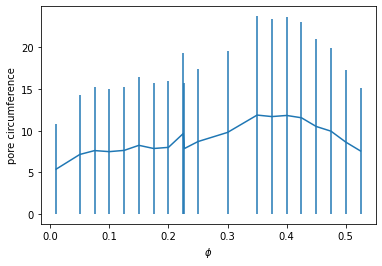

In [17]:
import matplotlib.pyplot as plt 

filter_attrs = {"delta": "0.2", "temperature": 0.1}
dset_name = "circumference"
axis_name = "phi"

def is_match(x,y):
    
        shared_items = {k: x for k in x if k in y and x[k] == y[k]}
        l = len(shared_items) 
        if l == len(y):
            return True
        else:
            return False 


def get_mean_along_one_axis(f,filter_attrs,dset_name,axis_name):
    '''
    input: 
    f: h5py object, contains groups of datasets, one group for each configuration
    attrs: dictionary of attributes to filter 
    dset_name: name of dataset to be averaged 
    axis_name: the name of the attr along which value is evaluated 

    output: 
    arr: np.array() with first column axis values,
        second column mean of dataset, third column standard deviation
    '''
    mean_v = []
    std_v = []
    x_v = []
    for group in f.keys():
        if is_match(f[group].attrs, filter_attrs):
            mean_v.append(f[group][dset_name][:].mean())
            std_v.append(f[group][dset_name][:].mean())
            x_v.append(float(f[group].attrs[axis_name]))

    arr = np.concatenate(
        (np.reshape(np.array(x_v), (-1,1)),
        np.reshape(np.array(mean_v),(-1,1)),
        np.reshape(np.array(std_v), (-1,1))), 
        axis=1)
    
    arr = arr[arr[:, 0].argsort()]
 
    plt.errorbar(arr[:,0],arr[:,1],arr[:,2])
    plt.xlabel("$\phi$")
    plt.ylabel("pore circumference")
    plt.show()

get_mean_along_one_axis(f,filter_attrs,dset_name,axis_name)



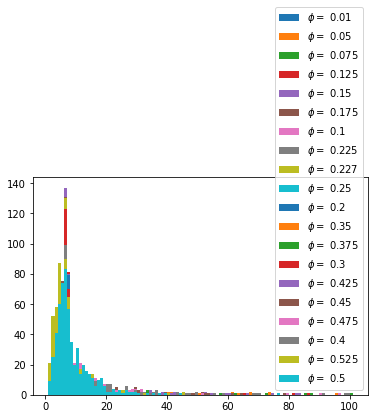

In [18]:
filter_attrs = {"delta": "0.2", "temperature": 0.1}
dset_name = "circumference"
axis_name = "phi"
def plot_distribution_along_axis(f,filter_attrs,dset_name,axis_name):
    fig,ax=plt.subplots(figsize=(20,20))
    for group in f.keys():
        if is_match(f[group].attrs, filter_attrs):
            x=f[group][dset_name][:]
            plt.hist(x,range=(1,101), bins=100, 
            label="$\phi =$ {}".format(f[group].attrs['phi']), histype='step,')
        
    plt.legend()
    plt.show()
            
plot_distribution_along_axis(f,filter_attrs,dset_name,axis_name)